In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Define constants

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Prepare data

Download data and save it

In [3]:
url = 'https://drive.google.com/file/d/1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5/view?usp=sharing'

In [4]:
!gdown --id 1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5

Downloading...
From: https://drive.google.com/uc?id=1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5
To: /content/MM17-WeiboRumorSet.zip
1.35GB [00:06, 200MB/s]


Unzip and save into folder train_extracted

In [5]:
import zipfile
with zipfile.ZipFile("MM17-WeiboRumorSet.zip","r") as zip_ref:
    zip_ref.extractall("./train_extracted")

Exract labels from image names and save image names with corresponding labels in dataframe

In [6]:
filenames1 = os.listdir("./train_extracted/MM17-WeiboRumorSet/rumor_images")
filenames01 = []
categories1 = []
for filename in filenames1:
    category = 1 # rumor
    categories1.append(1)
    s = "rumor_images/"+str(filename)
    filenames01.append(s)

df1 = pd.DataFrame({
    'filename': filenames01,
    'category': categories1
})

In [7]:
df1.head()

,filename,category
0,rumor_images/005xbNZzjw1et2qqxui3nj30hs0nqq3x.jpg,1
1,rumor_images/68fbe062jw1eh7msua13bj20dw0dwgog.jpg,1
2,rumor_images/498379fdjw1e8hcjpk4pjj20qe0ffacc.jpg,1
3,rumor_images/476b66c1jw1er67wet7aqj20cf0godgq.jpg,1
4,rumor_images/4ffc253fjw1ev0bigopl5j20f00qotaa.jpg,1


In [8]:
len(df1) # number of rumor images

7954

In [9]:
filenames2 = os.listdir("./train_extracted/MM17-WeiboRumorSet/nonrumor_images")
filenames02 = []
categories2 = []
for filename in filenames2:
    category2 = 0 # rumor
    categories2.append(0)
    s = "nonrumor_images/"+str(filename)
    filenames02.append(s)

df2 = pd.DataFrame({
    'filename': filenames02,
    'category': categories2
})

In [10]:
df2.head()

,filename,category
0,nonrumor_images/684ebae3jw1ezubj3nbqdj20c508ia...,0
1,nonrumor_images/4e5b54d8gw1ez2gbjygb7j20c805ja...,0
2,nonrumor_images/707e96d5gw1ez9qgz2svlj20g00cuq...,0
3,nonrumor_images/6693ce84gw1eynssnesnsj20c80c6q...,0
4,nonrumor_images/61ff32dejw1eypnogi19jj20b90g7t...,0


In [11]:
len(df2) # number of non rumor images

5318

In [12]:
df = df1.append(df2, ignore_index=True).reset_index(drop = True)

In [13]:
df.head()

,filename,category
0,rumor_images/005xbNZzjw1et2qqxui3nj30hs0nqq3x.jpg,1
1,rumor_images/68fbe062jw1eh7msua13bj20dw0dwgog.jpg,1
2,rumor_images/498379fdjw1e8hcjpk4pjj20qe0ffacc.jpg,1
3,rumor_images/476b66c1jw1er67wet7aqj20cf0godgq.jpg,1
4,rumor_images/4ffc253fjw1ev0bigopl5j20f00qotaa.jpg,1


In [14]:
len(df) # combined

13272

In [15]:
df.describe()

,category
count,13272.000000
mean,0.599307
std,0.490057
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [16]:
df.tail()

,filename,category
13267,nonrumor_images/4ee36f05gw1exmh9pxzxbj20go0a7d...,0
13268,nonrumor_images/4908cef0jw1emhlj6dikij20hm09u7...,0
13269,nonrumor_images/544a318cgw1euxd3sop66j2085064d...,0
13270,nonrumor_images/6541fc49gw1exz63c9158j20c80icg...,0
13271,nonrumor_images/470bf257gw1ey7ake02paj20m80et7...,0


Total count

In [17]:
label_counts = df.groupby('category').size()
print(label_counts)

category
0    5318
1    7954
dtype: int64


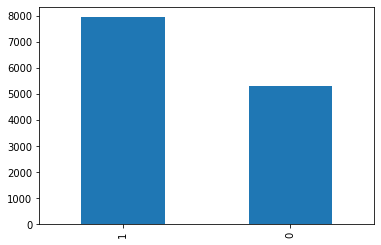

In [18]:
df['category'].value_counts().plot.bar()

Sample image

Shuffle df

In [19]:
# shuffle the DataFrame rows 
df = df.sample(frac = 1).reset_index(drop=True) 

In [20]:
df.head()

,filename,category
0,rumor_images/a2770e05jw1eham2w0ox5j20hs0jb40n.jpg,1
1,rumor_images/0066a2rdjw1etiu0enpllj30k00zkdl6.jpg,1
2,rumor_images/69605397gw1erf714zg45j20e20p0q46.jpg,1
3,nonrumor_images/63207a53jw1eyzkbyh7slj20gg09tm...,0
4,rumor_images/005wnIoqjw1ev1efv3469j30ez0qodhy.jpg,1


In [21]:
df.tail()

,filename,category
13267,rumor_images/6cf12800gw1ev1tu5lnudj20f00qon0h.jpg,1
13268,rumor_images/757344fdjw1eln5p3w5mlj20a00dcq3z.jpg,1
13269,nonrumor_images/620beb06gw1eylek8pak3j20c80c83...,0
13270,rumor_images/6ac256f5jw1e9obycy5gwj20h10m8wf1.jpg,1
13271,rumor_images/a1ee69c5jw1er08q8601kj207d05kaa8.jpg,1


Make a combined list with rumor and non rumor image paths last part

In [22]:
filenames = []
categories = []
for i in range(0, len(df)):
  filenames.append(str(df['filename'][i]))
  categories.append((df['category'][i]))
print(len(filenames))
print(len(categories))

13272
13272


In [23]:
print(filenames[0])
print(categories[0])
print(filenames[-1])
print(categories[-1])

rumor_images/a2770e05jw1eham2w0ox5j20hs0jb40n.jpg
1
rumor_images/a1ee69c5jw1er08q8601kj207d05kaa8.jpg
1


rumor_images/6b7cb8c5jw1e4q3698z0yj20hs0qo0wa.jpg


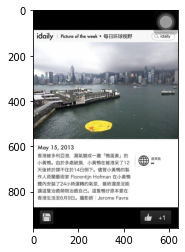

In [24]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

rumor_images/9e5a9f2bgw1ev1fdutrutj20et0m8dgy.jpg


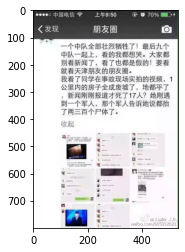

In [25]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

nonrumor_images/6a5ce645jw1ezhsu9nhgnj20m80gowg3.jpg


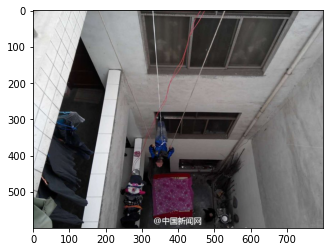

In [26]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

rumor_images/971102e1jw1ev1vdkof2yj20p018gn33.jpg


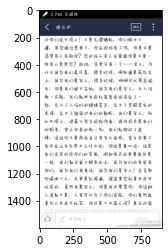

In [27]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

Build Model


Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layerreduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

Callbacks

In [29]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [30]:
earlystop = EarlyStopping(patience=10)

Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [32]:
callbacks = [earlystop, learning_rate_reduction]

Prepare data

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to rumor and 0 to nonrumor

In [33]:
df["category"] = df["category"].replace({0: 'nonrumor', 1: 'rumor'}) 

In [34]:
df.head()

,filename,category
0,rumor_images/a2770e05jw1eham2w0ox5j20hs0jb40n.jpg,rumor
1,rumor_images/0066a2rdjw1etiu0enpllj30k00zkdl6.jpg,rumor
2,rumor_images/69605397gw1erf714zg45j20e20p0q46.jpg,rumor
3,nonrumor_images/63207a53jw1eyzkbyh7slj20gg09tm...,nonrumor
4,rumor_images/005wnIoqjw1ev1efv3469j30ez0qodhy.jpg,rumor


Divide into 50% train and 50% test, Note that we have shuffled earlier

In [35]:
mid = int(len(df)/2)
df_train = df[:mid]
df_test = df[mid:]
print(len(df_train))
print(len(df_test))

6636
6636


In [36]:
train_df, validate_df = train_test_split(df_train, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

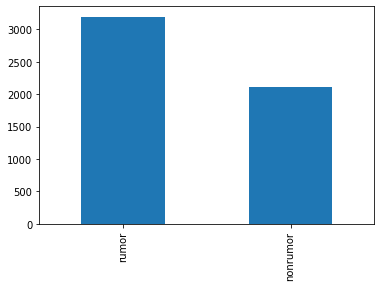

In [37]:
train_df['category'].value_counts().plot.bar()

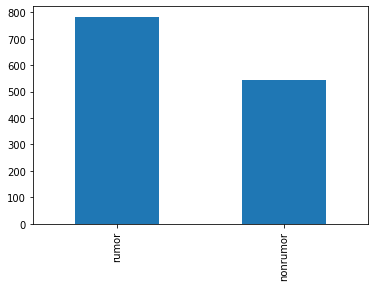

In [38]:
validate_df['category'].value_counts().plot.bar()

In [46]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

Traning Generator

In [47]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5295 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 13 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Validation Generator

In [48]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1327 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


See how our generator work

In [49]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


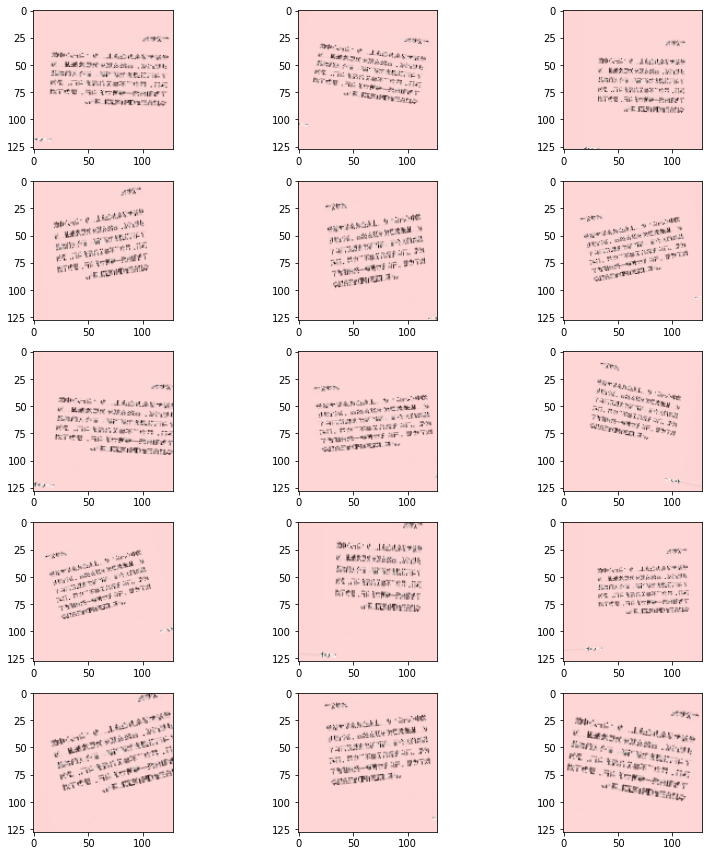

In [50]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Seems great

Fit Model

In [51]:
FAST_RUN = False

In [52]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
353/353 [==============================] - 64s 181ms/step - loss: 1.0082 - accuracy: 0.5401 - val_loss: 0.7460 - val_accuracy: 0.5674
Epoch 2/50
353/353 [==============================] - 64s 182ms/step - loss: 0.7540 - accuracy: 0.5692 - val_loss: 0.7241 - val_accuracy: 0.5689
Epoch 3/50
353/353 [==============================] - 65s 183ms/step - loss: 0.7018 - accuracy: 0.5855 - val_loss: 0.7402 - val_accuracy: 0.6114
Epoch 4/50
353/353 [==============================] - 65s 184ms/step - loss: 0.6766 - accuracy: 0.5924 - val_loss: 0.7320 - val_accuracy: 0.6015
Epoch 5/50
353/353 [==============================] - ETA: 0s - loss: 0.6817 - accuracy: 0.6004
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
353/353 [==============================] - 63s 180ms/step - loss: 0.6817 - accuracy: 0.6004 - val_loss: 0.7965 - val_accuracy: 0.6076
Epoch 6/50
353/353 [==============

Save Model

In [53]:
model.save_weights("model.h5")

In [54]:
model.save_weights("Rumor_Nonrumor_50epochs_model.h5")

In [74]:
# saving the dataframe 
df.to_csv('df_5331.csv') 

In [75]:
# saving the dataframe 
df_train.to_csv('df_train_5331.csv')
# saving the dataframe 
df_test.to_csv('df_test_5331.csv') 

In [55]:
from google.colab import files
files.download('Rumor_Nonrumor_50epochs_model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
files.download('df_5331.csv') 
files.download('df_train_5331.csv') 
files.download('df_test_5331.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Visualize Training

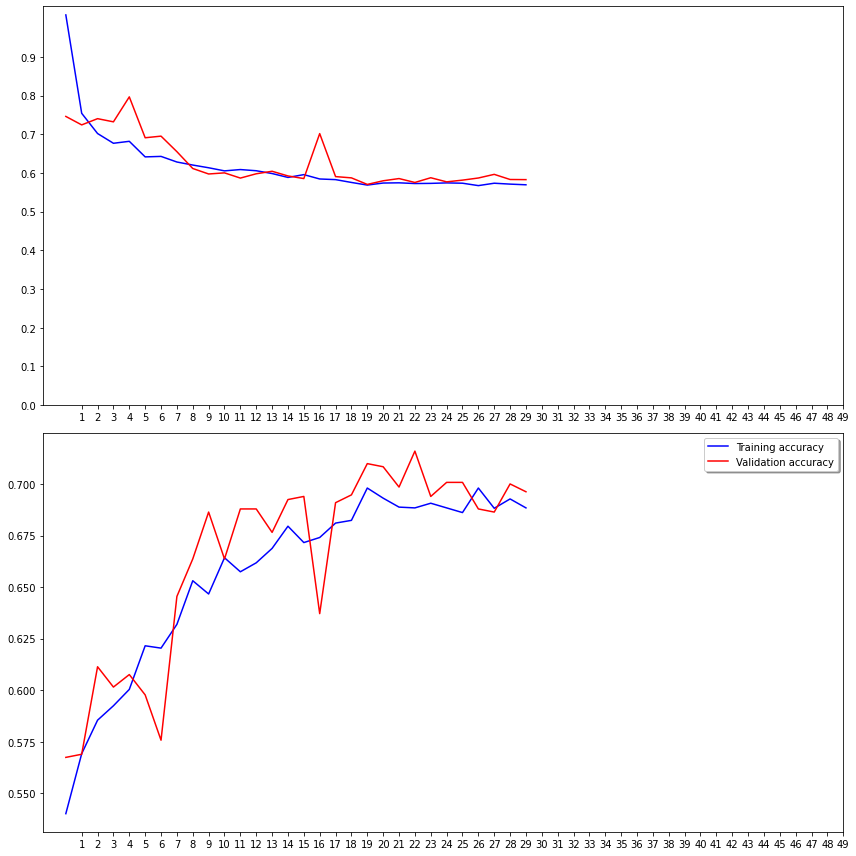

In [57]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

Prepare Testing Data

In [58]:
df_test.head()


,filename,category
6636,rumor_images/4f60671bjw1dtf3aa406kj.jpg,rumor
6637,rumor_images/0062G6IYjw1er1zfgcxclj30hs0nvmyx.jpg,rumor
6638,rumor_images/b0801bf1jw1eu9mh2ecurj20di07cdge.jpg,rumor
6639,rumor_images/61c99730jw1evjosotxrmj20c80f2mz4.jpg,rumor
6640,rumor_images/7d391fb1jw1ektkkntcgcj20a805l74e.jpg,rumor


In [59]:
df_test = df_test.reset_index(drop = True)

In [60]:
test_filenames = []
test_categories = []
for i in range(0,len(df_test)):
  test_filenames.append(df_test['filename'][i])
  test_categories.append(df_test['category'][i])
print(len(test_filenames))

6636


In [61]:
test_df = df_test
nb_samples = test_df.shape[0]

Create Testing Generator

In [62]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False,
    validate_filenames=False
)

Found 6636 non-validated image filenames.


Predict

In [63]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [64]:
print(predict)

[[0.75639075 0.24360919]
 [0.37740925 0.6225907 ]
 [0.7172026  0.28279737]
 ...
 [0.41844225 0.58155775]
 [0.01454294 0.9854571 ]
 [0.21340363 0.78659636]]


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [65]:
test_df['category_predicted'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [66]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category_predicted'] = test_df['category_predicted'].replace(label_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [67]:
test_df['category_predicted'] = test_df['category_predicted'].replace({ 'rumor': 1, 'nonrumor': 0 })
test_df['category'] = test_df['category'].replace({ 'rumor': 1, 'nonrumor': 0 })

Virtaulize Result

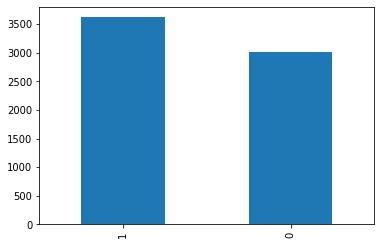

In [68]:
test_df['category_predicted'].value_counts().plot.bar()

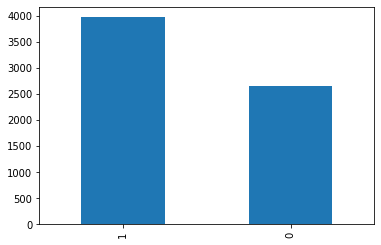

In [69]:
test_df['category'].value_counts().plot.bar()

In [70]:
y_pred = test_df['category_predicted']
y_true = test_df['category']

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.6968053044002411

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[1833,  828],
       [1184, 2791]])

In [77]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_true, y_pred))

0.3825187878646613


See predicted result with images

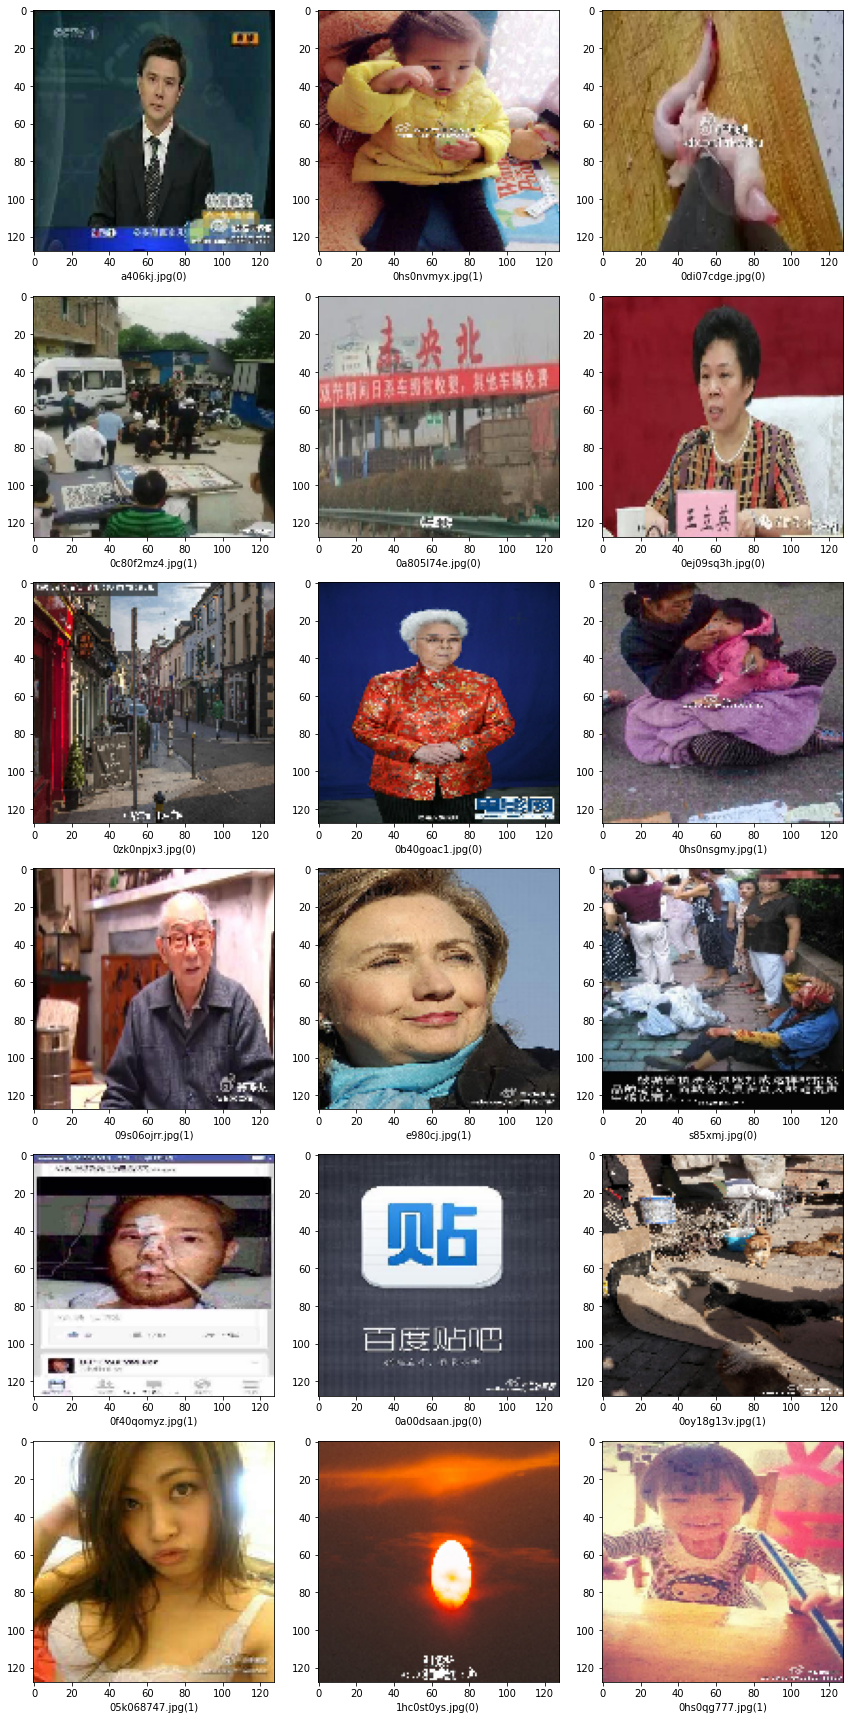

In [73]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category_predicted = row['category_predicted']
    img = load_img("./train_extracted/MM17-WeiboRumorSet/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename[int(3*len(filename)/4):] + '(' + "{}".format(category_predicted) + ')' )
plt.tight_layout()
plt.show()